In [ ]:
import pandas as pd
import matplotlib as mat
import seaborn as sea
import numpy as np

# ------------------------------------ Part 1 - Initial Dataset Overview ---------------------------------------------------

# -------- Load the Dataset --------
titanic = pd.read_csv('titanic.csv')
titanic.head()



In [ ]:
# (Data Exploration) Dataset Size 

dataset_size = titanic.shape
print(dataset_size[0])
print(dataset_size[1])

# -------- Categorize the Variables ---------
    # Name           |    # of Unique values        |       Type

    # PassengerId                5                           Continuous
    # Survived                   2                           Categorical
    # Pclass                     2                           Categorical
    # Name                       5                           Categorical
    # Sex                        2                           Categorical
    # Age                        4                           Continuous
    # SibSp                      2                           Categorical
    # Parch                      1                           Categorical
    # Ticket                     5                           Categorical
    # Fare                       5                           Continuous
    # Cabin                      3                           Categorical
    # Embarked                   2                           Categorical

    # brief summary of the datasets structure and variable types
        # There are 12 entities (or columns) in the dataset, which are listed above,
        # and of those entities 9 of them are categorical while 3 are continuous. 
        # Further, there are 891 instances in the dataset.


In [45]:
# ------------------------------------ Part 2 - Univariate Analysis  ------------------------------------------------------

# -------- Descriptive Statistics ---------

# Defining Continuous Variables
# continuous_vars = ['Age', 'Fare', 'PassengerId'] // decided to omit PassengerId
continuous_vars = ['Age', 'Fare']

# Displaying Continuous Summary Statistics
continuous_stats = titanic[continuous_vars].describe()
print(continuous_stats)

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [77]:
# Defining Categorical Variables
# categorical_vars = ['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'] // decided to omit a few
categorical_vars = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Displaying Categorical Frequency Counts
for var in categorical_vars:
    print(titanic[var].value_counts())
    print()

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



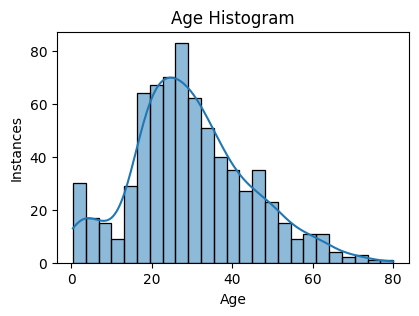

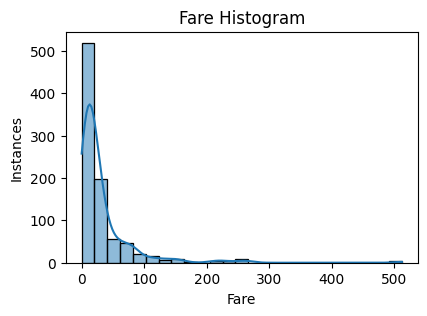

In [72]:
# -------- Visualizations --------

# Continuous Variables - Creating Histogram
for var in continuous_vars:
    mat.pyplot.figure(figsize = (10, 3))
    mat.pyplot.subplot(1, 2, 1)
    sea.histplot(titanic[var], kde = True, bins = 25)
    mat.pyplot.title(f'{var} Histogram')
    mat.pyplot.xlabel(var)
    mat.pyplot.ylabel('Instances')



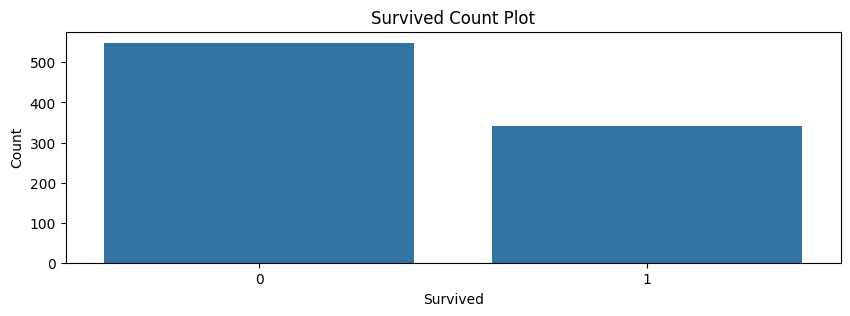

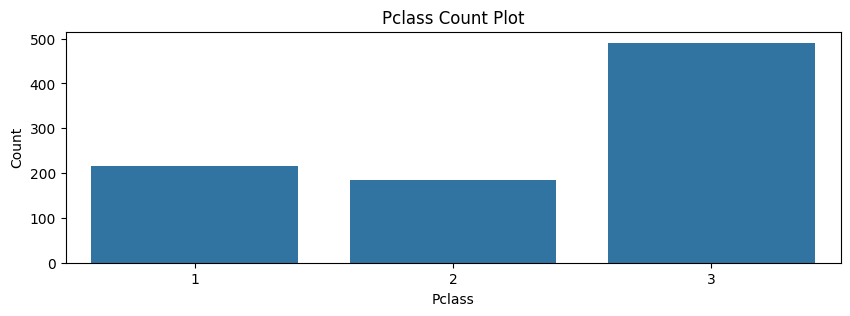

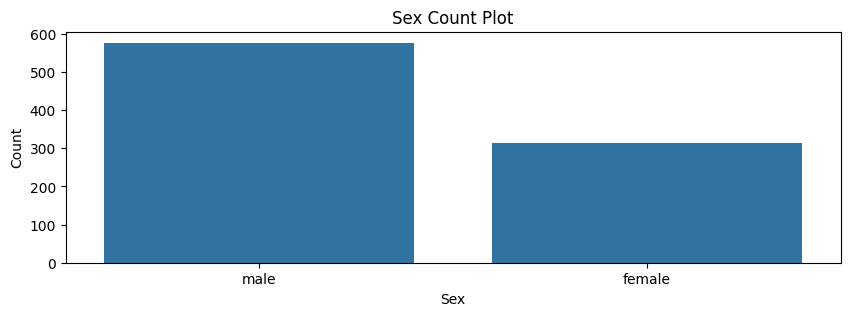

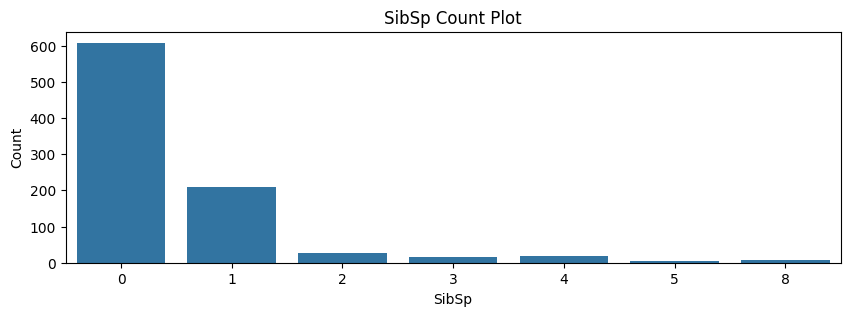

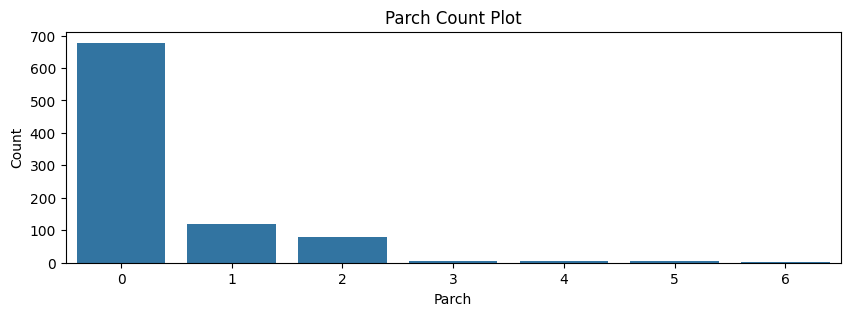

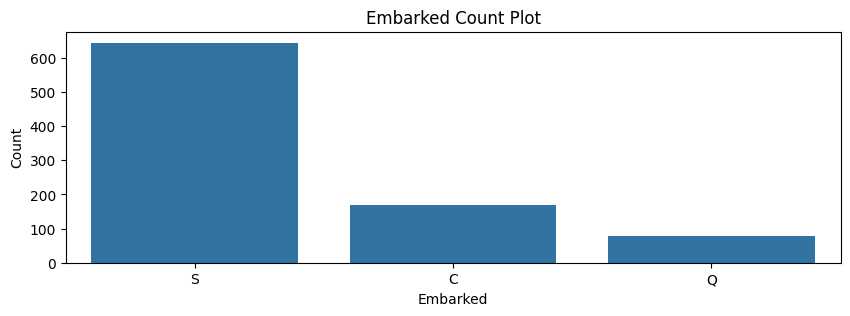

In [76]:
# Categorical Variables - Creating Count Plots
for var in categorical_vars:
    mat.pyplot.figure(figsize = (10, 3))
    sea.countplot(x = var, data = titanic)
    mat.pyplot.title(f'{var} Count Plot')
    mat.pyplot.xlabel(var)
    mat.pyplot.ylabel("Count")


In [ ]:
# -------- Interpretation --------
    # In terms of distribution for the continuous variables there is a right skew in both graphs.
    # we can also see that most passengers happen to be between the ages of 20-40 with outliers in the 70s and 80s
    # and most of the fares were in the range of 0-100 with outliers past 200-250.
    # In terms of distribution for the categorical variables, you can see that the parch and sibsp graphs are very similar,
    # each having a right skew, meaning that most people that went on the titanic were not parents nor had siblings.
    # For the embarked count plot we see that most people who got on the titanic got on at southamption, the sex graph
    # shows that most people who got on the titanic were males, and the Pclass graph tells us that most passengers 
    # were on the third class. There are also missing values in Age, Cabin, and Embarked; Although the missing values in
    # embarked are close to, if not, negliable.

Text(0, 0.5, 'Age')

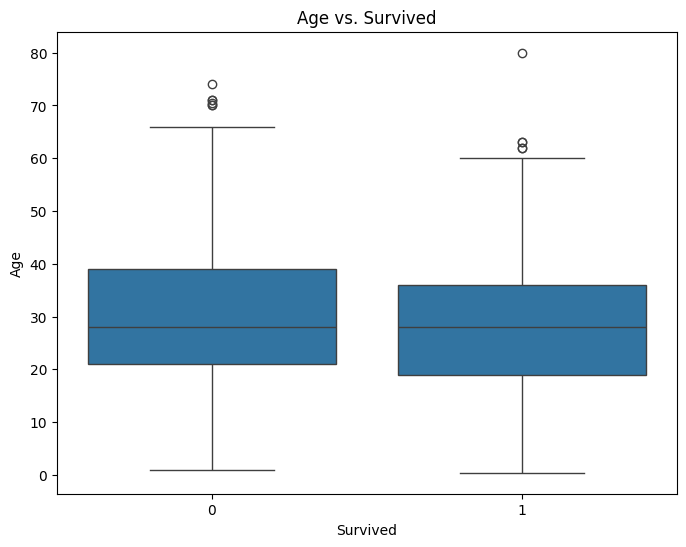

In [78]:
# ------------------------------------ Part 3 - Bivariate Analysis  ------------------------------------------------------

# -------- Visualizations --------

# Continuous + Categorical Pairs

# Age vs. Survived Box Plot
mat.pyplot.figure(figsize = (8, 6))
sea.boxplot(x = 'Survived', y = 'Age', data = titanic)
mat.pyplot.title('Age vs. Survived')
mat.pyplot.xlabel('Survived')
mat.pyplot.ylabel('Age')


Text(0, 0.5, 'Fare')

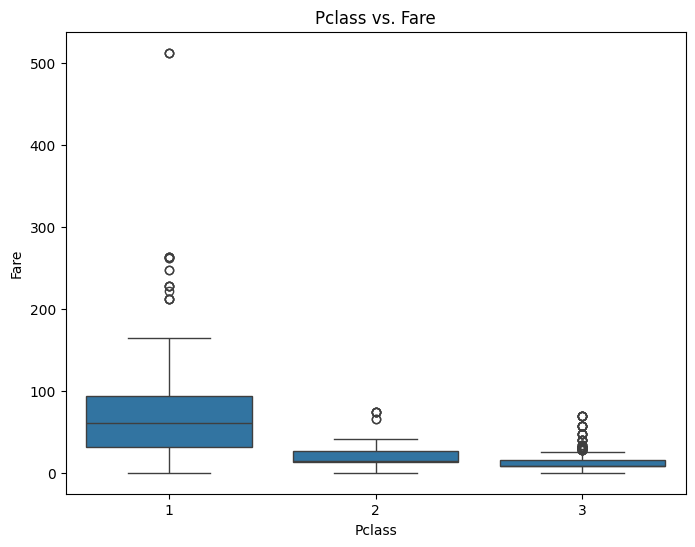

In [79]:
# Fare vs. Pclass Box Plot
mat.pyplot.figure(figsize = (8, 6))
sea.boxplot(x = 'Pclass', y = 'Fare', data = titanic)
mat.pyplot.title('Pclass vs. Fare')
mat.pyplot.xlabel('Pclass')
mat.pyplot.ylabel('Fare')

Text(0, 0.5, 'Count')

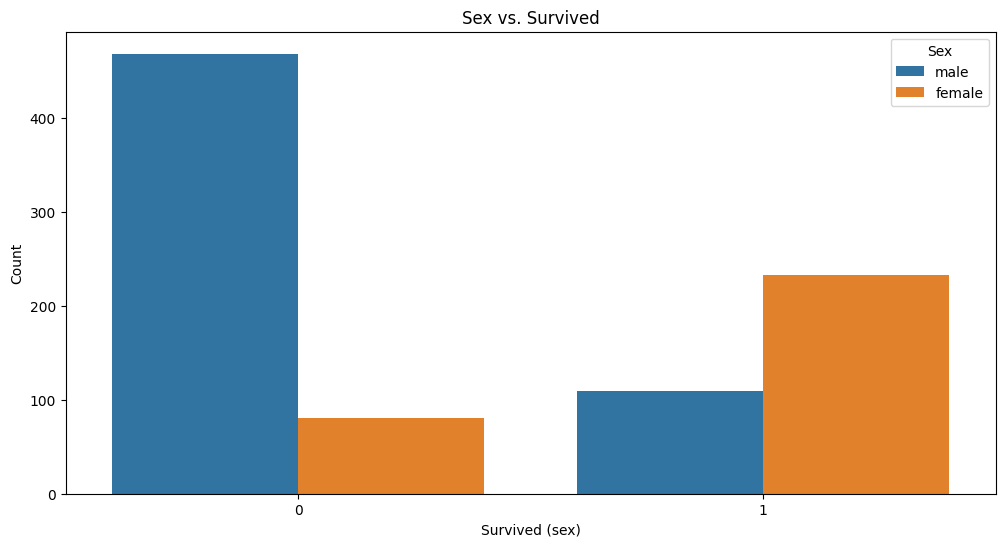

In [96]:
# Categorical + Categorical Pairs

# Sex vs. Survived Count Plot
mat.pyplot.figure(figsize = (12, 6))
sea.countplot(x = 'Survived', hue = 'Sex', data = titanic)
mat.pyplot.title('Sex vs. Survived')
mat.pyplot.xlabel('Survived (sex)')
mat.pyplot.ylabel('Count')

Text(0, 0.5, 'Count')

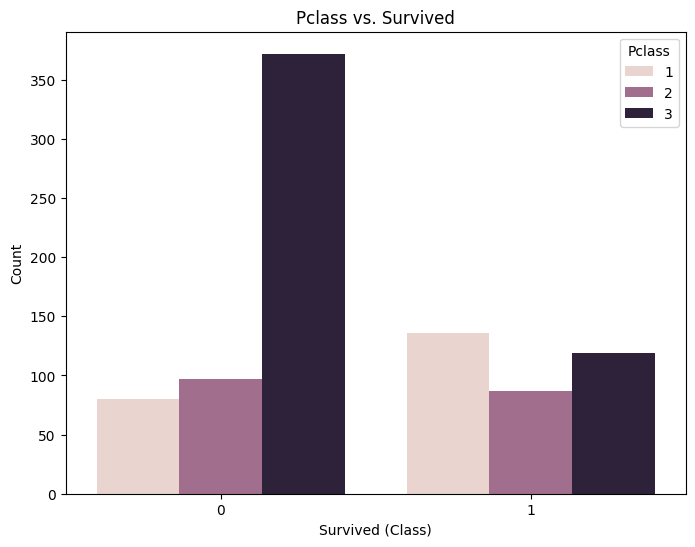

In [95]:
# Pclass vs. Survived Count plot
mat.pyplot.figure(figsize = (8, 6))
sea.countplot(x = 'Survived', hue = 'Pclass', data = titanic)
mat.pyplot.title('Pclass vs. Survived')
mat.pyplot.xlabel('Survived (Class)')
mat.pyplot.ylabel('Count')

In [80]:
# -------- Descriptive Statistics --------

# Age vs. Survived Desriptive Statistics
age_v_survived_stats = titanic.groupby('Survived')['Age'].describe()
print(age_v_survived_stats)

          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


In [81]:
# Fare vs. Pclass Desriptive Statistics
pclass_v_fare_stats = titanic.groupby('Pclass')['Fare'].describe()
print(pclass_v_fare_stats)

        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


In [85]:
# Sex vs. Survived Descriptive Statistics
sex_vs_survived_stats = titanic.pivot_table(values = 'Survived', index = 'Sex', aggfunc = 'mean')
print(sex_vs_survived_stats)

        Survived
Sex             
female  0.742038
male    0.188908


In [86]:
# Pclass vs. Survived Descriptive Statistics
pclass_v_survived_stats = titanic.pivot_table(values = 'Survived', index = 'Pclass', aggfunc = 'mean')
print(pclass_v_survived_stats)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [ ]:
# -------- Iterpretation -------- 

# Age vs. Survived Iterpretation
    # From the box plot and descriptive statistics, you can see that the stats between those who survived and did not were
    # pretty similar. You can see a slight trend in younger passengers having a better survival rate highlighted
    # in the 25th and 75th percentiles. As the standard deviation for survivors is higher, there is higher spread in the
    # range of the age of the survivors which indicates that more younger children and older adults survived. We can also
    # see that the mean ages for those who survived is lower than those who did not (28.34 < 30.63). As for any potential
    # data issues that might affect relationships, we know of outliers in age which could skew the means and may
    # not accurately represent the actual survival pattern. There were also missing values in Age which could skew the data.

# Fare vs. Pclass Iterpretation
    # From the box plot and descriptive statistics, you can see that the people that paid more on average for their fare
    # were on lower classes (lower in terms of number not quality). You can also see that in the first class there was more
    # variance between prices in the percentiles, with the change from the 25th percentile being double the price compared
    # the higher classes raising max 10% in fares. Another observation is that in all classes the minimums were the same
    # at a fare of 0. As for any potential data issues that might affect relationships, we know of outliers in fares which
    # skew the average, for example, the 512.33 fare and/or the 0 fares.

# Sex vs. Survived Iterpretation
    # From the count plot and descriptive statistics, you can see that female passengers survived more than their counterpart
    # with female passengers having a survival rate of 74.2% and male passengers having a survival rate of 18.9%. We can see
    # that there is a strong relationsihp between survival rate and sex with female passengers survival rates being 3 times
    # as high as male survival rates. As for any potential data issues that might affect relationships, there were more male
    # passengers than female passengers which could affect the survival rates.

# pclass vs. survived Iterpretation
    # From the count plot and descriptive statistics, you can see that first class passengeres had the highest survival rate
    # at about 63%, second class passengers had the second highest survival rate at about 47.3%, and third class passengers
    # had the lowest survival rate at 24.2%. We can see that there is a strong relationship between what class a passenger
    # was on and their chance at survival, showing that the better/lower class you had the better your chances of survival.
    # As for any potential data issues that might affect relationships, there are more passengers in the third clas than the
    # other two classes which may lead to misinterpretation of survival rates between classes.

In [108]:
# ------------------------------------ Part 4 - Identifying Data Issues  ---------------------------------------------------

# (Data Exploration)
print(titanic.isnull().sum())
print()
print(titanic['Age'].skew())
print()
print(titanic['Age'].kurtosis())
print()
print(titanic['Fare'].skew())
print()
print(titanic['Fare'].kurtosis())

# -------- Potential Data Issues --------

# Outliers
# There were, in fact, extreme values in the continuous variables, in both the fare and age entities. The fare entity had 
# extreme outliers in the first class passengers with the presence of high fares, e.g. minimum fare was 0 and maximum fare
# was 512.3. The Age entity also had extreme outliers with both very young ages and very high ages, e.g. youngest passenger
#  was 0.42 years old and oldest was 80.

# Missing Values
# The columns that had missing data were the Cabin, Age, and Embarked columns. I did not use the Cabin and Embarked columns
# so they did not affect any of my data analysis, although I did use Age which could have affected the analysis related to age
# and survival as some passenger's ages are unknown.

# Non-Normality
# The Age distribution has outliers although, according to the skewness value, it is close to symmetric distribution (because
# it is close to 0) being aproximately 0.39, indicating a very small right skew. The Age entity also shows low kurtosis as it
# is approximately 0.18 which is under 3 which indicates a light-tailed distribution. The Fare distribution also has otliers
# and unlike the age entity shows it has a high right skew with its skewness value being approximately 4.8. The Fare entity 
# also has high kurtosis being that its kurtosis value is approximately 33.4 which is above the threshold of 3 indicating
# a heavy-tailed distribution.

# -------- Brief Summary --------

# I identified that there were two problems with the Age entity, those being that there were a significant number of missing
# values and were some outliers. The outliers had little effect on my data analysis because the data was only slightly skewwed
# to the right, meaning it was close to being a symmetric distribution, however the missing values can introduce bias and 
# reduce the accuracy of my analysis. I also identified that there were 2 main issues with my Fare entity, those being that 
# there were significant outliers and there was a skew. The outliers experienced in the fare entity were significant and
# could potentially introduce bias and muddy relationships between entities. The skew experienced in the fare entity show
# high kurtosis which can affect the performance of linear regression and lead to biased estimates. A way to circumvent this
#  would be to imputate missing data with the mean or just amputate the rows with missing data.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0.38910778230082704

0.17827415364210353

4.787316519674893

33.39814088089868
